# Mise en application 2 : Entraînez votre premier k-NN
## 1. Intro et data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data_path = "~/Documents/openclassroom/Fomation_ingenieur_ML/data/"

Pour afficher l'image (le chiffre) à partir du dataset mnist, j'ai construit la fonction suivante :


In [2]:
def show_number(mnist_datum):
    tmp = 1 - mnist_datum.copy()
    pixels = tmp.reshape(28,28)
    plt.imshow(pixels, cmap='gray')
    plt.show()

Dans le cours, il était proposé d'utiliser :

<code>from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)</code>

Mais la RAM de mon PC ne semblait pas suffisante, j'ai donc été sur le dépôt pour télécharger le csv (https://www.openml.org/d/554) .. mais le csv était pas pratique (transforme le bunch en pandas ...) 



In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(70000, 784)


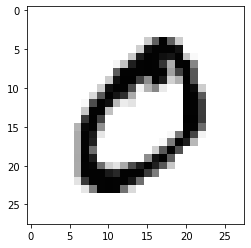

In [4]:
print(type(mnist))
print(type(mnist.data))
print(mnist.data.shape)
show_number(mnist.data[1])

On réduit le jeu de donnée à une taille plus petite pour que notre exemple tourne en temps suffisamment petit, et on sépare en train/test :

In [5]:
# sample = np.random.randint(70000, size=5000)
sample = np.sort(np.random.choice(mnist.data.shape[0], size=7000, replace=False))

data = mnist.data[sample]
target = mnist.target[sample]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8)

## 2. Construction du modèle knn de base : 
Enfin, on passe au KNN : 

In [6]:
from sklearn import neighbors
knn_model = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train,y_train)
knn_model.predict(X_test[0:2])

array(['8', '1'], dtype=object)

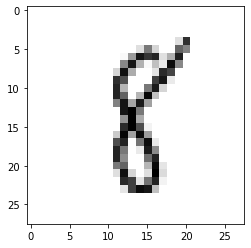

8


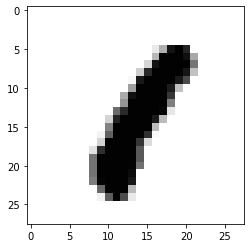

1


array(['8', '1'], dtype=object)

In [7]:
for k in range(2):
    show_number(X_test[k])
    print( y_test[k])
knn_model.predict(X_test[0:2])

## 3. Construction du knn avec choix du k : (par lecture de l'erreur) 
Ok, on a donc la base pour avancer : un modèle des k plus proche voisins qui tourne. Maintenant, pour ce premier jet, j'avais fixé k=3, mais c'est un hyperparamètre : faisons le varier, et comparons les résultats avec l'attribut "score" de la classe 